In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_path=r'D:\ml_dataset\research\Warp-C\train_all'
validation_dataset_path=r'D:\ml_dataset\research\Warp-C\test_all'

In [3]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 8823 images belonging to 28 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 1551 images belonging to 28 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : bottle-blue
1 : bottle-blue-full
2 : bottle-blue5l
3 : bottle-blue5l-full
4 : bottle-dark
5 : bottle-dark-full
6 : bottle-green
7 : bottle-green-full
8 : bottle-milk
9 : bottle-milk-full
10 : bottle-multicolor
11 : bottle-multicolorv-full
12 : bottle-oil
13 : bottle-oil-full
14 : bottle-transp
15 : bottle-transp-full
16 : bottle-yogurt
17 : canister
18 : cans
19 : detergent-box
20 : detergent-color
21 : detergent-transparent
22 : detergent-white
23 : glass-dark
24 : glass-green
25 : glass-transp
26 : juice-cardboard
27 : milk-cardboard


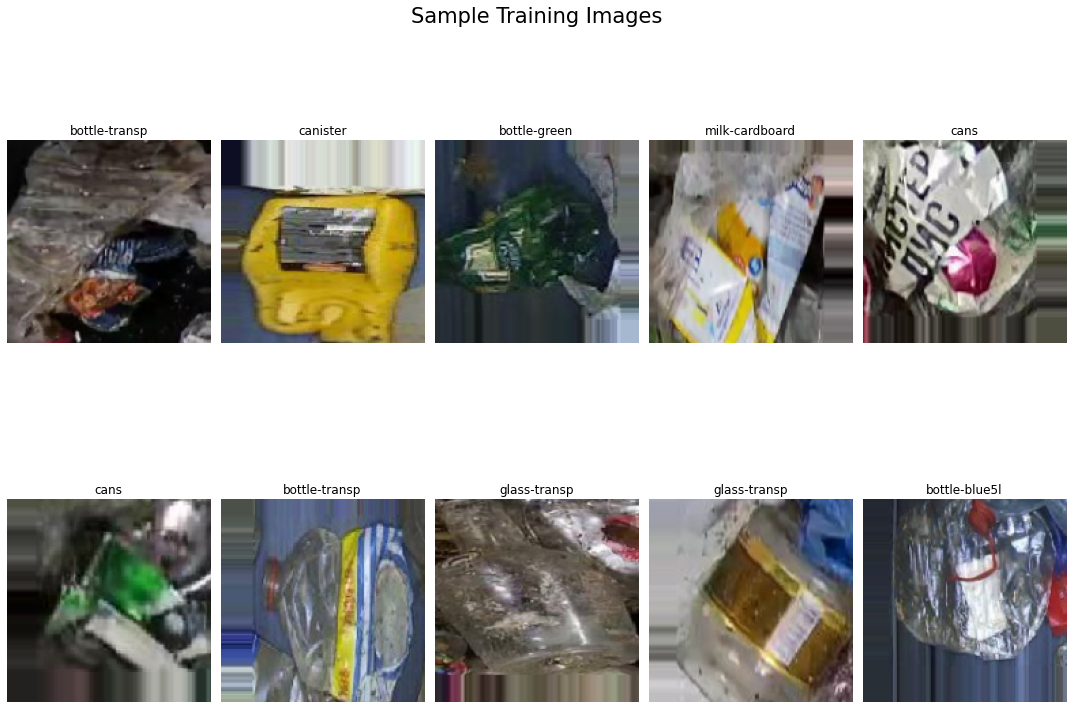

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=28, activation='softmax')
    ])
    
    return model

In [9]:
cnn_model = create_model()

In [10]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [12]:
optimizer = Adam(learning_rate=0.001)

In [13]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=1,
                       callbacks=[reduce_lr])

Epoch 1/50
276/276 [==============================] - 531s 2s/step - loss: 4.1330 - accuracy: 0.1616 - val_loss: 5.0619 - val_accuracy: 0.1393 - lr: 0.0010
Epoch 2/50
276/276 [==============================] - 510s 2s/step - loss: 2.7048 - accuracy: 0.2374 - val_loss: 2.5763 - val_accuracy: 0.2334 - lr: 0.0010
Epoch 3/50
276/276 [==============================] - 517s 2s/step - loss: 2.5044 - accuracy: 0.2702 - val_loss: 2.2510 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 4/50
276/276 [==============================] - 510s 2s/step - loss: 2.3886 - accuracy: 0.2845 - val_loss: 2.3885 - val_accuracy: 0.2863 - lr: 0.0010
Epoch 5/50
276/276 [==============================] - 519s 2s/step - loss: 2.3430 - accuracy: 0.3032 - val_loss: 2.4995 - val_accuracy: 0.2908 - lr: 0.0010
Epoch 6/50
276/276 [==============================] - 504s 2s/step - loss: 2.2732 - accuracy: 0.3107 - val_loss: 2.2589 - val_accuracy: 0.3217 - lr: 0.0010
Epoch 7/50
276/276 [==============================] - 508s 2s/st